In [11]:
import os
import numpy as np
import glob
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

def get_section_results(file, clip=True):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    Z = []
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Z.append(v.simple_value)
    if clip:
        X = (np.array(X)-1)[1:]
    else:
        X = np.array(X)
    return X, np.array(Y), np.array(Z)

def get_log_dir(prefix, data_dir):
    dirs = sorted(os.listdir(data_dir), reverse=True)
    for e_dir in dirs:
        if prefix in e_dir:
            return e_dir
        
def get_log_data(prefix, data_dir, clip=True):
    data_sub_dir = get_log_dir(prefix, data_dir)
    for file in os.listdir(os.path.join(data_dir, data_sub_dir)):
        if file.startswith("events"):
            return get_section_results(os.path.join(os.path.join(data_dir, data_sub_dir), file), clip)

In [2]:
from matplotlib import pyplot as plt

In [4]:
data_dir = "run_logs"

In [5]:
os.listdir(data_dir)

['hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_03-11-2020_04-55-56',
 'hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_03-11-2020_04-57-06',
 'hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_03-11-2020_04-56-44',
 'hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_03-11-2020_04-52-51',
 'hw4_q3_cheetah_cheetah-cs285-v0_03-11-2020_05-11-21',
 'hw4_q3_cheetah_cheetah-cs285-v0_03-11-2020_06-03-05',
 'hw4_q3_obstacles_obstacles-cs285-v0_03-11-2020_04-58-49',
 'hw4_q3_obstacles_obstacles-cs285-v0_03-11-2020_05-01-39',
 'hw4_q3_obstacles_obstacles-cs285-v0_03-11-2020_05-19-40',
 'hw4_q3_reacher_reacher-cs285-v0_03-11-2020_05-25-48',
 'hw4_q4_reacher_ensemble1_reacher-cs285-v0_03-11-2020_08-21-56',
 'hw4_q4_reacher_ensemble1_reacher-cs285-v0_03-11-2020_17-18-42',
 'hw4_q4_reacher_ensemble3_reacher-cs285-v0_03-11-2020_08-25-47',
 'hw4_q4_reacher_ensemble3_reacher-cs285-v0_03-11-2020_17-22-33',
 'hw4_q4_reacher_ensemble5_reacher-cs285-v0_03-11-2020_08-35-40',
 'hw4_q4_reacher_ensemble5_reacher-c

In [12]:
x, y, z = get_log_data("hw4_q2", data_dir, clip=False)

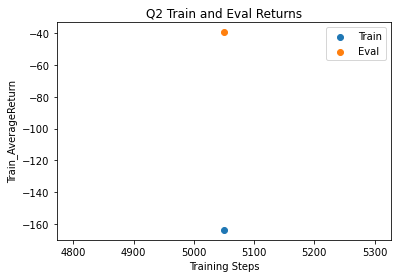

In [15]:
plt.scatter(x, y, label="Train")
plt.scatter(x, z, label="Eval")
plt.xlabel("Training Steps")
plt.ylabel("Train_AverageReturn")
plt.title("Q2 Train and Eval Returns")
plt.legend()

No handles with labels found to put in legend.


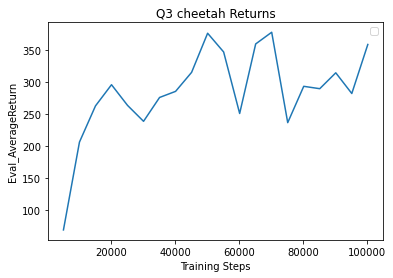

No handles with labels found to put in legend.


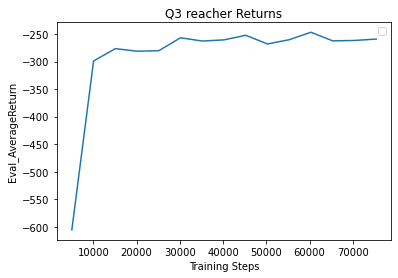

No handles with labels found to put in legend.


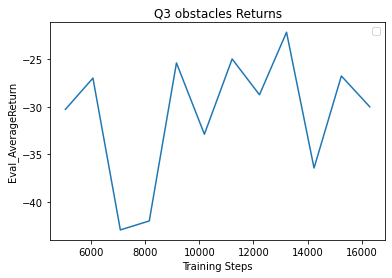

In [18]:
for env in ("cheetah", "reacher", "obstacles"):
    plt.figure()
    x, y, z = get_log_data(f"hw4_q3_{env}", data_dir, False)
    plt.plot(x, z)
    plt.xlabel("Training Steps")
    plt.ylabel("Eval_AverageReturn")
    plt.title(f"Q3 {env} Returns")
    plt.legend()
    plt.show()
    
    
# plt.xlabel("Training Steps")
# plt.ylabel("Train_AverageReturn")
# plt.title("Q2 Double Q Learning Returns")
# plt.legend()

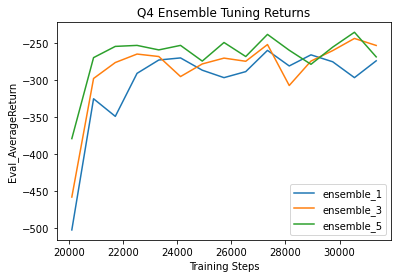

In [21]:
for ens_num in (1, 3, 5):
    x, y, z = get_log_data(f"hw4_q4_reacher_ensemble{ens_num}", data_dir, False)
    plt.plot(x, z, label=f"ensemble_{ens_num}")
    
    
plt.xlabel("Training Steps")
plt.ylabel("Eval_AverageReturn")
plt.title("Q4 Ensemble Tuning Returns")
plt.legend()

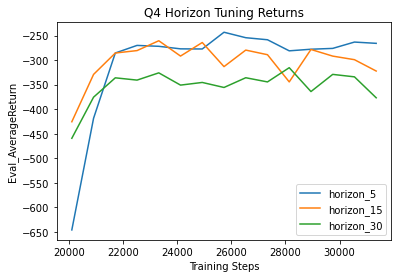

In [22]:
for horiz_num in (5, 15, 30):
    x, y, z = get_log_data(f"hw4_q4_reacher_horizon{horiz_num}", data_dir, False)
    plt.plot(x, z, label=f"horizon_{horiz_num}")
    
    
plt.xlabel("Training Steps")
plt.ylabel("Eval_AverageReturn")
plt.title("Q4 Horizon Tuning Returns")
plt.legend()

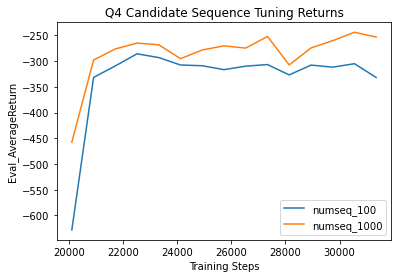

In [23]:
for seq_num in (100, 1000):
    x, y, z = get_log_data(f"hw4_q4_reacher_numseq{seq_num}", data_dir, False)
    plt.plot(x, z, label=f"numseq_{seq_num}")
    
    
plt.xlabel("Training Steps")
plt.ylabel("Eval_AverageReturn")
plt.title("Q4 Candidate Sequence Tuning Returns")
plt.legend()